# Neural Networks - The components

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 06/01/2025   | Martin | Create   | Created notebook for chapter 6 | 
| 07/01/2025   | Martin | Create   | Completed implementing operational gates and tested various activation functions | 
| 08/01/2025   | Martin | Create   | Completed single layer NN and implementing different layers (Conv, Maxpool) | 

# Content

* [Introduction](#introduction)
* [Implementing Operational Gates](#implementing-operational-gates)
* [Gates and activation functions](#gates-and-activation-functions)
* [Implementing one-layer NN](#implementing-one-layer-neural-network)
* [Implementing different layers](#implementing-different-layers)

# Introduction

__Neural Network__ - a sequence of operations applied to a matrix of input data. Collection of additions and multiplications followed by a non-linear function

__Key terms__
* _Backpropogation_ - Updating the model based on the learning rate and the output of the loss function. Done through a sequence of derivatives to determine the changes applied to the weight on each node in the network
* _Activation function_ - Function that applies non-linearity to the model
* _Hyperparameters_ - Values that define the model and are selected before training begins. Tuning this improves model performance

# Implementing Operational Gates

_Operational gates "=" Each node acts as a matheamtical operation that is applied to the data fed to it_

e.g

$$
f(x) = a \cdot x
$$

* $a$: variable weights
* $x$: input data

This process will return a result and the result is fed into the next operational gate

$$
f_2(x) = f(x) + b
$$

* $b$: the bias term (another variable)

The output of this function will be the predicted value of the model. The loss function i.e the difference between the output and the target value is computed and used to score the model and implement backprop.

Emphasis on the output rather than intermediate values

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

Implement a single node to "learn" and update itself to the desired weights

* Target weight: 50
* Data fed: 5
* Optimiser: SGD
* Loss function: MSE

In [8]:
# Initialise weights and input data
a = tf.Variable(4.)
x_data = tf.keras.Input(shape=(1,))
x_val = tf.constant([[5.]], dtype=tf.float32)

# Configure the node
multiply_layer = tf.keras.layers.Lambda(lambda x: tf.multiply(a, x))
outputs = multiply_layer(x_data)

# Define the model
model = tf.keras.Model(inputs=x_data, outputs=outputs, name='node_1')

print(model.summary())

Model: "node_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


First a model with a only the weights trained

In [9]:
# Implement the training loop
optimiser = tf.keras.optimizers.SGD(0.01)

print("Optimising a multiplication gate output to 50")
for i in range(10):
  # define the gradient tape
  with tf.GradientTape() as tape:
    # get the output - forward pass
    model_output = model(x_val)

    # get the loss
    loss = tf.square(tf.subtract(model_output, 50.))

  # get the gradients to update weights
  gradients = tape.gradient(loss, a)

  # apply changes to the weights
  optimiser.apply_gradients(zip([gradients], [a]))

  print(f"Step: {i}: => {a.numpy()} * {x_val} = {a.numpy()*x_val}")
    

Optimising a multiplication gate output to 50
Step: 0: => 7.0 * [[5.]] = [[35.]]
Step: 1: => 8.5 * [[5.]] = [[42.5]]
Step: 2: => 9.25 * [[5.]] = [[46.25]]
Step: 3: => 9.625 * [[5.]] = [[48.125]]
Step: 4: => 9.8125 * [[5.]] = [[49.0625]]
Step: 5: => 9.90625 * [[5.]] = [[49.53125]]
Step: 6: => 9.953125 * [[5.]] = [[49.765625]]
Step: 7: => 9.9765625 * [[5.]] = [[49.882812]]
Step: 8: => 9.98828125 * [[5.]] = [[49.941406]]
Step: 9: => 9.994140625 * [[5.]] = [[49.970703]]


Next a model with the bias term included

In [10]:
# Initialise weights and input data
a = tf.Variable(4., dtype=tf.float32)
b = tf.Variable(1., dtype=tf.float32)
x_data = tf.keras.Input(shape=(1,))
x_val = tf.constant([[5.]], dtype=tf.float32)

# Configure the node
multiply_layer = tf.keras.layers.Lambda(lambda x: tf.multiply(a, x))
add_layer = tf.keras.layers.Lambda(lambda x: tf.add(b, x))
intermediate = multiply_layer(x_data)
outputs = add_layer(intermediate)

# Define the model
model = tf.keras.Model(inputs=x_data, outputs=outputs, name='node_2')

print(model.summary())

Model: "node_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Implement the training loop
optimiser = tf.keras.optimizers.SGD(0.01)

print("Optimising a multiplication gate output to 50")
for i in range(10):
  # define the gradient tape
  with tf.GradientTape(persistent=True) as tape:
    # get the output - forward pass
    model_output = model(x_val)

    # get the loss
    loss = tf.square(tf.subtract(model_output, 50.))

  # get the gradients to update weights
  gradients_a = tape.gradient(loss, a)
  gradients_b = tape.gradient(loss, b)

  # apply changes to the weights
  optimiser.apply_gradients(zip([gradients_a, gradients_b], [a, b]))

  print(f"Step: {i}: => {a.numpy()} * {x_val} + {b.numpy()} = {a.numpy()*x_val+b.numpy()}")

Optimising a multiplication gate output to 50
Step: 0: => 6.899999618530273 * [[5.]] + 1.5799999237060547 = [[36.08]]
Step: 1: => 8.291999816894531 * [[5.]] + 1.8583998680114746 = [[43.318398]]
Step: 2: => 8.960160255432129 * [[5.]] + 1.9920319318771362 = [[46.79283]]
Step: 3: => 9.280877113342285 * [[5.]] + 2.0561752319335938 = [[48.46056]]
Step: 4: => 9.434821128845215 * [[5.]] + 2.0869641304016113 = [[49.26107]]
Step: 5: => 9.508713722229004 * [[5.]] + 2.101742744445801 = [[49.64531]]
Step: 6: => 9.544182777404785 * [[5.]] + 2.1088366508483887 = [[49.82975]]
Step: 7: => 9.56120777130127 * [[5.]] + 2.112241744995117 = [[49.91828]]
Step: 8: => 9.569379806518555 * [[5.]] + 2.1138761043548584 = [[49.960777]]
Step: 9: => 9.573302268981934 * [[5.]] + 2.1146605014801025 = [[49.981174]]


📜 __NOTE: Good resource on describing how `GradientTape` works: [here](https://www.geeksforgeeks.org/tf-gradienttape-in-tensorflow/)__

## Interpreting results

* Tensorflow keeps track of the model operations and variables, making changes to them based on the optimisation algorithm (SGD in the exmaple)
* Variables that are listed as `trainable` will be tracked by TF `GradientTape` and only these values will change - not the data
* All changes are done and optimised by TF

---

# Gates and activation functions

Introduce activation functions that bring in non-linearity to the model

* Sigmoid: $sigmoid(x)=\sigma(x)=\frac{1}{1+e^x}$
* Rectified linear unit (ReLU): $max(0, x)$

Same 1 layer NN using both activation functions and compare. Config:

* Target value: 0.75
* Loss: L2 distance (MSE)
* Optimiser: SGD

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)
np.random.seed(42)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [3]:
# Initialise variables
batch_size = 50

# define parameters
x = np.random.normal(2, 0.1, 500)
x_data = tf.keras.Input(shape=(1,))

a1 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b1 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))
a2 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b2 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))

W0000 00:00:1736234898.625441    1663 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# Use the subclassing API
class MyCustomGateSigmoid(tf.keras.layers.Layer):
  def __init__(self, units, a1, b1):
    super(MyCustomGateSigmoid, self).__init__()
    self.units = units
    self.a1 = a1
    self.b1 = b1
  
  def call(self, inputs):
    return tf.math.sigmoid(inputs * self.a1 + self.b1)

# Define the custom layer
my_custom_gate_sigmoid = MyCustomGateSigmoid(units=1, a1=a1, b1=b1)
output_sigmoid = my_custom_gate_sigmoid(x_data)

# Build the model
model_sigmoid = tf.keras.Model(inputs=x_data, outputs=output_sigmoid, name='node_sigmoid')

In [5]:
# Use the subclassing API
class MyCustomGateRelu(tf.keras.layers.Layer):
  def __init__(self, units, a2, b2):
    super(MyCustomGateRelu, self).__init__()
    self.units = units
    self.a2 = a2
    self.b2 = b2
  
  def call(self, inputs):
    return tf.nn.relu(inputs * self.a2 + self.b2)

# Define the custom layer
my_custom_gate_relu = MyCustomGateRelu(units=1, a2=a2, b2=b2)
output_relu = my_custom_gate_relu(x_data)

# Build the model
model_relu = tf.keras.Model(inputs=x_data, outputs=output_relu, name='node_relu')

In [6]:
# Define the training loop
optimiser_sigmoid = tf.keras.optimizers.SGD(0.01)
optimiser_relu = tf.keras.optimizers.SGD(0.01)


# Run loop across gates
print("Optimising Sigmoid and Relu outputs to 0.75\n")

loss_vec_sigmoid = []
loss_vec_relu = []

activation_sigmoid = []
activation_relu = []

for i in range(500):

  # Randomly select data to be used for training
  rand_indices = np.random.choice(len(x), size=batch_size)
  x_vals = np.transpose([x[rand_indices]])

  with tf.GradientTape(persistent=True) as tape:

    # Forward pass
    sigmoid_output = model_sigmoid(x_vals)
    relu_output = model_relu(x_vals)

    # Get loss
    loss_sigmoid = tf.reduce_mean(tf.square(tf.subtract(sigmoid_output, 0.75)))
    loss_vec_sigmoid.append(loss_sigmoid)
    loss_relu = tf.reduce_mean(tf.square(tf.subtract(relu_output, 0.75)))
    loss_vec_relu.append(loss_relu)

  # gradient computation
  gradients_a1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.a1)
  gradients_b1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.b1)
  
  gradients_a2 = tape.gradient(loss_relu, my_custom_gate_relu.a2)
  gradients_b2 = tape.gradient(loss_relu, my_custom_gate_relu.b2)

  # Applying changes to weights
  optimiser_sigmoid.apply_gradients(zip([gradients_a1, gradients_b1], [my_custom_gate_sigmoid.a1, my_custom_gate_sigmoid.b1]))
  optimiser_relu.apply_gradients(zip([gradients_a2, gradients_b2], [my_custom_gate_relu.a2, my_custom_gate_relu.b2]))

  output_sigmoid = model_sigmoid(x_vals)
  output_relu = model_relu(x_vals)

  activation_sigmoid.append(np.mean(output_sigmoid))
  activation_relu.append(np.mean(output_relu))

  if i % 50 == 0:
    print(f"Sigmoid = {str(np.mean(output_sigmoid))} | Relu = {str(np.mean(output_relu))}")

Optimising Sigmoid and Relu outputs to 0.75

Sigmoid = 0.053502932 | Relu = 0.41717994
Sigmoid = 0.06592579 | Relu = 0.74954367
Sigmoid = 0.07885075 | Relu = 0.7502562
Sigmoid = 0.10079076 | Relu = 0.75001615
Sigmoid = 0.1306659 | Relu = 0.74857485
Sigmoid = 0.18301636 | Relu = 0.7482997
Sigmoid = 0.2614831 | Relu = 0.7496901
Sigmoid = 0.36430547 | Relu = 0.75106066
Sigmoid = 0.46104255 | Relu = 0.74935675
Sigmoid = 0.5375254 | Relu = 0.7483227


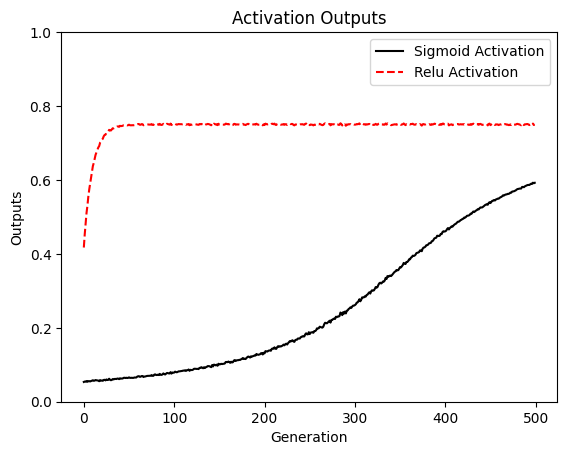

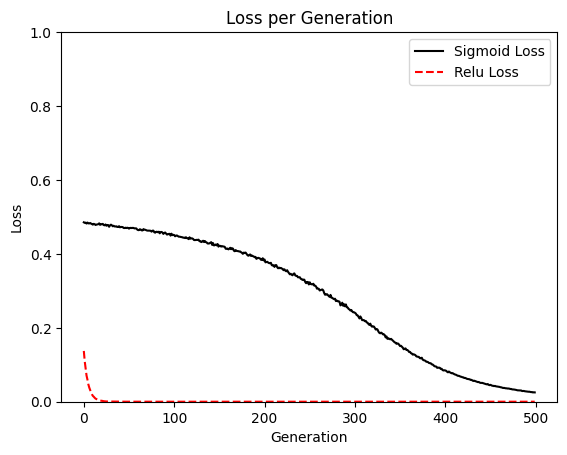

In [7]:
# Plotting the loss and activation outputs
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss') 
plt.plot(loss_vec_relu, 'r--', label='Relu Loss') 
plt.ylim([0, 1.0]) 
plt.title('Loss per Generation') 
plt.xlabel('Generation') 
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show() 

## Interpreting results

* Both show convergence, but Relu achieves it much faster than sigmoid
* Relu returns 0 outputs more often which introduces _sparsity_, allowing for convergence to happen faster, but loss of controlled gradients (potentially vanishing gradient problem on larger networks)
* Sigmoid has well-controlled gradients and prevents extreme values (too low or too high) at the expense of slower convergence because updates are not as drastic

__Other alternatives__

* Smoother (like sigmoid): arctan, hypertangent, heaveside step
* Faster (like Relu): softplus, leaky ReLU, ELU

---

# Implementing one-layer neural network

Implementing on the iris dataset

__🚨 NN's are based on matrix multiplicatoin, so the dimensions of data and matrix must align__

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [4]:
# Load data
iris = datasets.load_iris()
# Get only relevant features
x_vals = np.array([x[0:3] for x in iris.data])

# Get target variable - Peral Width
y_vals = np.array([x[3] for x in iris.data])

# Setting seed
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# Split dat ainto train/test - 80/20
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [6]:
# Normalise by column (min-max norm)
def normalise_cols(m):
  col_max = m.max(axis=0)
  col_min = m.min(axis=0)
  return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalise_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalise_cols(x_vals_test))

In [7]:
# Define the model
BATCH_SIZE = 50
HIDDEN_LAYER_NODES = 5

# Input layer
x_data = tf.keras.Input(shape=(3,), dtype=tf.float32)

# Create variables for both NN Layer
a1 = tf.Variable(tf.random.normal(shape=[3, HIDDEN_LAYER_NODES], seed=seed)) # inputs -> hd1
b1 = tf.Variable(tf.random.normal(shape=[HIDDEN_LAYER_NODES], seed=seed)) # hd1 bias
a2 = tf.Variable(tf.random.normal(shape=[HIDDEN_LAYER_NODES, 1], seed=seed)) # hd1 -> prediction
b2 = tf.Variable(tf.random.normal(shape=[1], seed=seed)) # bias for output

# Define the layers
hidden_output = tf.keras.layers.Lambda(lambda x: tf.nn.relu(tf.add(tf.matmul(x, a1), b1)))
final_output = tf.keras.layers.Lambda(lambda x: tf.nn.relu(tf.add(tf.matmul(x, a2), b2)))

hidden_layer = hidden_output(x_data)
output = final_output(hidden_layer)

# Build the model
model = tf.keras.Model(inputs=x_data, outputs=output, name='one_layer_neural_network')

W0000 00:00:1736306067.507129     932 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "one_layer_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Training loop
optimiser = tf.keras.optimizers.SGD(0.005)

loss_vec = []
test_loss =[]

for i in range(500):
  rand_index = np.random.choice(len(x_vals_train), size=BATCH_SIZE)
  rand_x = x_vals_train[rand_index]
  rand_y = np.transpose([y_vals_train[rand_index]])

  # Create the gradienttape
  with tf.GradientTape(persistent=True) as tape:
    output = model(rand_x)

    loss = tf.reduce_mean(tf.square(rand_y - output))
    loss_vec.append(np.sqrt(loss))
  
  gradient_a1 = tape.gradient(loss, a1)
  gradient_b1 = tape.gradient(loss, b1)
  gradient_a2 = tape.gradient(loss, a2)
  gradient_b2 = tape.gradient(loss, b2)

  optimiser.apply_gradients(
    zip([gradient_a1, gradient_a2, gradient_b1, gradient_b2],
    [a1, a2, b1, b2])
  )

  # Test data
  output_test = model(x_vals_test)
  loss_test = tf.reduce_mean(tf.square(np.transpose([y_vals_test]) - output_test))
  test_loss.append(np.sqrt(loss_test))

  if (i+1)%50==0:
    print('Generation: ' + str(i+1) + '. Loss = ' + str(np.mean(loss)))

Generation: 50. Loss = 0.6273957
Generation: 100. Loss = 0.15347697
Generation: 150. Loss = 0.15431024
Generation: 200. Loss = 0.11715934
Generation: 250. Loss = 0.12236561
Generation: 300. Loss = 0.12134756
Generation: 350. Loss = 0.072587565
Generation: 400. Loss = 0.14590776
Generation: 450. Loss = 0.14075774
Generation: 500. Loss = 0.13127385


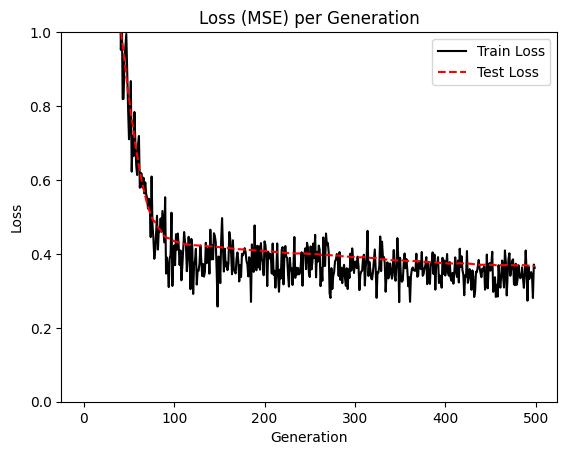

In [12]:
%matplotlib inline

plt.ylim([0, 1.0])
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

## Interpreting results

* Training is not as smooth becuase (1) batches during training will result in fluctuations since it points only to the trend of the batch (2) train set will impact variables in the model causing different results across each pass
* Implemented a hidden layer with 15 weights (3 input variables, 5 hidden nodes) and 5 biases (5 hidden nodes)
* Generally favourable results with error hovering between the 0.12-0.15 mark


---

# Implementing Different Layers

Introduce the use of different layers and connecting them:

1. Convolutional layers - usually use for multidimensional data (e.g images) to aggregate and then apply a non-linear function across the dimensions
2. Maxpool layers - Reduces the number of features between each layer (doesn't actually remove, just sets them to 0)

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

For 1D data

For convolution layers, use this formula to determine the size of the output:

$$
output\ size = \frac{(W-F+2P)}{S}+1
$$

* $W$ - Input Size
* $F$ - Filter Size
* $P$ - Padding Size
* $S$ - Stride Size

Good resource on calculating Activation size and the number of parameters: [here](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

__⚠️ ALERT: That the size of the subsequent layers (if needed to be specified) must be accurate, else there will be an error thrown__

In [14]:
# Hyperparameters
DATA_SIZE = 25
CONV_SIZE = 5
MAXPOOL_SIZE = 5
STRIDE_SIZE = 1
NUM_OUTPUTS = 5

In [19]:
# Define the model architecture
## Input layer
x_input_1d = tf.keras.Input(shape=(DATA_SIZE, 1), dtype=tf.float32, name='input_layer')

## Convolution
conv_output = tf.keras.layers.Conv1D(
  kernel_size=(CONV_SIZE), # size of the convolutional window
  filters=DATA_SIZE, # dimension of the output space
  strides=STRIDE_SIZE, # stride length of the convolution
  padding="valid",
  name='convolution_layer'
)(x_input_1d)

# Activation layer
activation_output = tf.keras.layers.ReLU(name='activation_layer')(conv_output)

# Maxpooling layer
maxpool_output = tf.keras.layers.MaxPool1D(
  strides=STRIDE_SIZE,
  pool_size=MAXPOOL_SIZE,
  padding='valid',
  name='maxpool_layer'
)(activation_output)

# Fully Connected layer
full_output = tf.keras.layers.Dense(units=NUM_OUTPUTS, name='fully_connected_layer')(maxpool_output)

model_1D = tf.keras.Model(inputs=x_input_1d, outputs=full_output, name='model_1D')
model_1D.summary()

======= 1D Data =======


Model: "model_1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolution_layer (Conv1D)      │ (None, 21, 25)         │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer (ReLU)         │ (None, 21, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_layer (MaxPooling1D)    │ (None, 17, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer (Dense)   │ (None, 17, 5)          │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print('======= 1D Data =======\n')

# Input
print("---- Input layer ----\n")
print(f'Input = array of length {x_input_1d.shape[1]}')

# Convolution
print("---- Convolution layer ----\n")
print(f"Convolution with filter, length = {CONV_SIZE}, stride size = {STRIDE_SIZE},"
f"results in an array of length {conv_output.shape[1]}")

# Activation
print("---- Activation layer ----\n")
print('Input = above array of length %d' % (conv_output.shape[1]))
print('ReLU element wise returns an array of length %d' % (activation_output.shape[1]))

# Max Pool 
print('\n== maxpool_layer ==')
print('Input = above array of length %d' % (activation_output.shape[1]))
print('MaxPool, window length = %d, stride size = %d, results in the array of length %d' %
     (MAXPOOL_SIZE,STRIDE_SIZE,maxpool_output.shape[1]))

# Fully Connected 
print('\n== fully_connected_layer ==')
print('Input = above array of length %d' % (maxpool_output.shape[1]))
print('Fully connected layer on all 4 rows with %d outputs' % 
      (full_output.shape[1]))

======= 1D Data =======

---- Input layer ----

Input = array of length 25
---- Convolution layer ----

Convolution with filter, length = 5, stride size = 1,results in an array of length 21
---- Activation layer ----

Input = above array of length 21
ReLU element wise returns an array of length 21

== maxpool_layer ==
Input = above array of length 21
MaxPool, window length = 5, stride size = 1, results in the array of length 17

== fully_connected_layer ==
Input = above array of length 17
Fully connected layer on all 4 rows with 17 outputs


📜 NOTE: One-dimensional data is import to consider in convulational networks. Time series, signal processing, and some text embeddings are considered to be one-dimensional.

For 2D Data

In [28]:
# Hyperparameters
row_size = 10
col_size = 10
conv_size = 2
conv_stride_size = 2
maxpool_size = 2
maxpool_stride_size = 1
num_outputs = 5

In [30]:
# Define the model architecture
# Input layer
x_input_2d = tf.keras.Input(shape=(row_size, col_size, 1), dtype=tf.float32, name='input_layer_2d')

# Convolutional layer
convolution_output_2d = tf.keras.layers.Conv2D(
  kernel_size=(conv_size),
  filters=conv_size,
  strides=conv_stride_size,
  padding='valid',
  name='convolution_layer_2d'
)(x_input_2d)

# Activation layer
activation_output_2d = tf.keras.layers.ReLU(name='activation_layer_2d')(convolution_output_2d)

# Maxpool layer
maxpool_output_2d = tf.keras.layers.MaxPool2D(
  strides=maxpool_stride_size,
  pool_size=maxpool_size,
  padding='valid',
  name='maxpool_layer_2d'
)(activation_output_2d)

# Fully Connected layer
full_output_2d = tf.keras.layers.Dense(units=num_outputs, name='fully_connected_layer_2d')(maxpool_output_2d)

# Define Model
model_2d = tf.keras.Model(inputs=x_input_2d, outputs=full_output_2d, name='model_2D')
model_2d.summary()

Model: "model_2D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2d (InputLayer)     │ (None, 10, 10, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolution_layer_2d (Conv2D)   │ (None, 5, 5, 2)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_2d (ReLU)      │ (None, 5, 5, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_layer_2d (MaxPooling2D) │ (None, 4, 4, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_2d        │ (None, 4, 4, 5)        │            15 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
convolution_output_2d.shape

(None, 5, 5, 2)

In [36]:
print('>>>> 2D Data <<<<')

# Input 
print('\n== input_layer ==')
print('Input = %s array' % (str(x_input_2d.shape[1:3])))

# Convolution
print('\n== convolution_layer ==')
print('%s Convolution, stride size = [%d, %d] , results in the %s array' % 
      ([conv_size,conv_size],conv_stride_size,conv_stride_size,str(convolution_output_2d.shape[1:3])))

# Activation
print('\n== activation_layer ==')
print('Input = the above %s array' % (str(convolution_output_2d.shape[1:3])))
print('ReLU element wise returns the %s array' % (str(activation_output_2d.shape[1:3])))

# Max Pool
print('\n== maxpool_layer ==')
print('Input = the above %s array' % (str(activation_output_2d.shape[1:3])))
print('MaxPool, stride size = [%d, %d], results in %s array' % 
      (maxpool_stride_size,maxpool_stride_size,str(maxpool_output_2d.shape[1:3])))

# Fully Connected
print('\n== fully_connected_layer ==')
print('Input = the above %s array' % (str(maxpool_output_2d.shape[1:3])))
print('Fully connected layer on all %d rows results in %s outputs' % 
      (maxpool_output_2d.shape[1],full_output_2d.shape[3]))

>>>> 2D Data <<<<

== input_layer ==
Input = (10, 10) array

== convolution_layer ==
[2, 2] Convolution, stride size = [2, 2] , results in the (5, 5) array

== activation_layer ==
Input = the above (5, 5) array
ReLU element wise returns the (5, 5) array

== maxpool_layer ==
Input = the above (5, 5) array
MaxPool, stride size = [1, 1], results in (4, 4) array

== fully_connected_layer ==
Input = the above (4, 4) array
Fully connected layer on all 4 rows results in 5 outputs


## Interpreting results

* Importance of shapes and sizes in neural networks